## TF-IDF Vectorizer Model Comparison

HOW TO RUN - 
1. Select Cell from the list of menu.
2. Run All

#### Importing the required libraries for data cleaning

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

dataset = pd.read_csv('labeled_data.csv')
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Aadesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [3]:
dt_trasformed = dataset[['class', 'tweet']]
y = np.array(dt_trasformed['class'])

In [4]:
y = np.array(y)

### Cleaning the data

#### We not remove all rubbish information from the data so that it does not contribute or skew model training. This is data-preprocessing and it is an important part of cleaning and preparing the data before training the models

In [5]:
corpus = []
for i in range(0, len(y)):
  text = re.sub('[^a-zA-Z]', ' ', dt_trasformed['tweet'][i])
  text = text.lower()
  text = re.sub(r'\$\w*', '', text) 
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text) 
  text = re.sub(r'#', '', text)
  text = text.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
  text = ' '.join(text)
  corpus.append(text)

#### TF-IDF Vectorizer is called which converts text data into vectors for the ML models. 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfVectorizer(max_features = 2000)
X = tfidf_transformer.fit_transform(corpus).toarray()

#### Importing essential ML models

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

In [8]:
models = [RandomForestClassifier(n_estimators = 7, criterion = 'entropy'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors = 5, p = 2),
          DecisionTreeClassifier(criterion = 'entropy'),
          GaussianNB(),
          LinearSVC(C=0.01, loss='squared_hinge')]

In [9]:
classifiers=['Random Forest Classifier',
             'Logistic Regression',
             'KNN Classifier',
             'Decision Tree Classifier',
             'Gaussian Naive Bayes',
             'Linear Support Vector Classifier']

In [10]:
def getData(model_type, X, y):
    result = []
    scores1 = cross_val_score(model_type, X, y, cv=10, scoring='precision_weighted')
    print("Precision(avg): %0.3f (+/- %0.3f)" % (scores1.mean(), scores1.std() * 2))
    result.append(scores1.mean())
    scores2 = cross_val_score(model_type, X, y, cv=10, scoring='recall_weighted')
    print("Recall(avg): %0.3f (+/- %0.3f)" % (scores2.mean(), scores2.std() * 2))
    result.append(scores2.mean())
    scores3 = cross_val_score(model_type, X, y, cv=10, scoring='f1_weighted')
    print("F1-score(avg): %0.3f (+/- %0.3f)" % (scores3.mean(), scores3.std() * 2))
    result.append(scores3.mean())
    print("\n")
    return result

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
import warnings
warnings.filterwarnings("ignore")

### Models Comparison - PART 1

In [13]:
classfier_scores=[]
for i in range(len(models)):
    print("Classifier used - > {}".format(classifiers[i]))
    classifier = models[i]
    classifier.fit(X_train,y_train)
    y_pred_svc = classifier.predict(X_test)
    print(classification_report(y_test, y_pred_svc,zero_division=1))

Classifier used - > Random Forest Classifier
              precision    recall  f1-score   support

           0       0.43      0.17      0.25       279
           1       0.93      0.96      0.94      3852
           2       0.83      0.87      0.85       826

    accuracy                           0.90      4957
   macro avg       0.73      0.67      0.68      4957
weighted avg       0.88      0.90      0.89      4957

Classifier used - > Logistic Regression
              precision    recall  f1-score   support

           0       0.55      0.17      0.26       279
           1       0.92      0.97      0.94      3852
           2       0.85      0.84      0.85       826

    accuracy                           0.90      4957
   macro avg       0.77      0.66      0.68      4957
weighted avg       0.89      0.90      0.89      4957

Classifier used - > KNN Classifier
              precision    recall  f1-score   support

           0       0.19      0.23      0.21       279
         

### Models Comparison - PART 2

In [14]:
classfier_scores=[]
for i in range(len(models)):
    print("Classifier used - > {}".format(classifiers[i]))
    classfier_scores.append(getData(models[i], X, y))

Classifier used - > Random Forest Classifier
Precision(avg): 0.882 (+/- 0.022)
Recall(avg): 0.895 (+/- 0.027)
F1-score(avg): 0.883 (+/- 0.021)


Classifier used - > Logistic Regression
Precision(avg): 0.893 (+/- 0.026)
Recall(avg): 0.902 (+/- 0.029)
F1-score(avg): 0.890 (+/- 0.020)


Classifier used - > KNN Classifier
Precision(avg): 0.727 (+/- 0.021)
Recall(avg): 0.603 (+/- 0.041)
F1-score(avg): 0.641 (+/- 0.033)


Classifier used - > Decision Tree Classifier
Precision(avg): 0.876 (+/- 0.012)
Recall(avg): 0.876 (+/- 0.038)
F1-score(avg): 0.875 (+/- 0.025)


Classifier used - > Gaussian Naive Bayes
Precision(avg): 0.754 (+/- 0.033)
Recall(avg): 0.294 (+/- 0.061)
F1-score(avg): 0.352 (+/- 0.075)


Classifier used - > Linear Support Vector Classifier
Precision(avg): 0.835 (+/- 0.051)
Recall(avg): 0.844 (+/- 0.018)
F1-score(avg): 0.808 (+/- 0.019)




In [15]:
precisions=[]
recalls=[]
f1s=[]
for i in classfier_scores:
    precisions.append(i[0])
    recalls.append(i[1])
    f1s.append(i[2])

In [19]:
temp = pd.DataFrame()
temp['Model'] = classifiers
temp['Precision'] = precisions
temp['Recall'] = recalls
temp['F1 Scores'] = f1s
temp

,Model,Precision,Recall,F1 Scores
0,Random Forest Classifier,0.882153,0.895212,0.882731
1,Logistic Regression,0.892818,0.901588,0.889909
2,KNN Classifier,0.727155,0.603158,0.641137
3,Decision Tree Classifier,0.876354,0.876047,0.875098
4,Gaussian Naive Bayes,0.754204,0.293872,0.351638
5,Linear Support Vector Classifier,0.835201,0.843523,0.807615


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

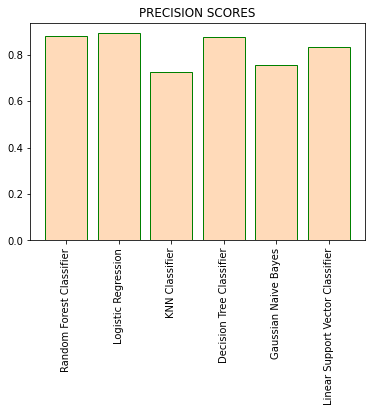

In [16]:
plt.title('PRECISION SCORES')
plt.bar(classifiers, precisions, color = 'peachpuff', edgecolor='green')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

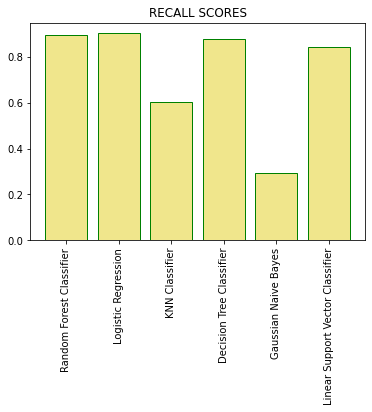

In [17]:
plt.title('RECALL SCORES')
plt.bar(classifiers, recalls, color= 'khaki', edgecolor='green')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

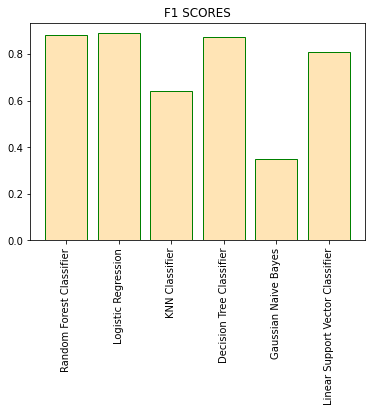

In [18]:
plt.title('F1 SCORES')
plt.bar(classifiers, f1s, color = 'moccasin', edgecolor='green')
plt.xticks(rotation='vertical')